## Mandelbrot Set

With this example we want to demonstrate the Tensorflow is not strictly used for Deep Learning but is a generic scientific framework. 

This example is taken from the official [Mandelbrot Set](https://www.tensorflow.org/versions/r0.8/tutorials/mandelbrot/index.html#mandelbrot-set)

In [13]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display

import warnings
warnings.filterwarnings("ignore")

In [14]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = StringIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [15]:
sess = tf.InteractiveSession()


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x10d86f290>> ignored


In [16]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [17]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [18]:
tf.initialize_all_variables().run()

In [19]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [20]:
for i in range(200): step.run()

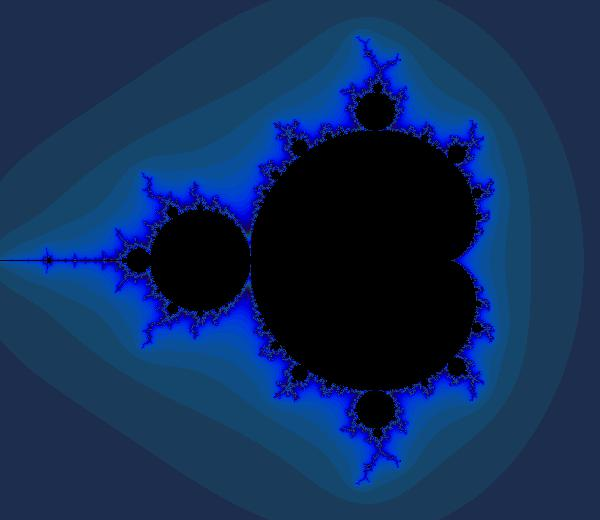

In [21]:
DisplayFractal(ns.eval())